# UNSUPERVISED ML PROJECT

## Iris Clustering Project

### Objective
The objective of this project is to evaluate the understanding and application of clustering techniques on the Iris dataset using two clustering algorithms: KMeans and Hierarchical Clustering.

### Dataset
The Iris dataset, available in the sklearn library, will be used for this project.


In [3]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Determining the Optimal Number of Clusters

### Elbow Method
The Elbow Method helps in determining the optimal number of clusters by plotting the sum of squared distances (inertia) between data points and their assigned cluster centroids for different values of K. The "elbow" point in the graph indicates the best number of clusters.

C:\Users\augus\anaconda new\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\augus\anaconda new\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\augus\anaconda new\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\augus\anaconda new\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, wh

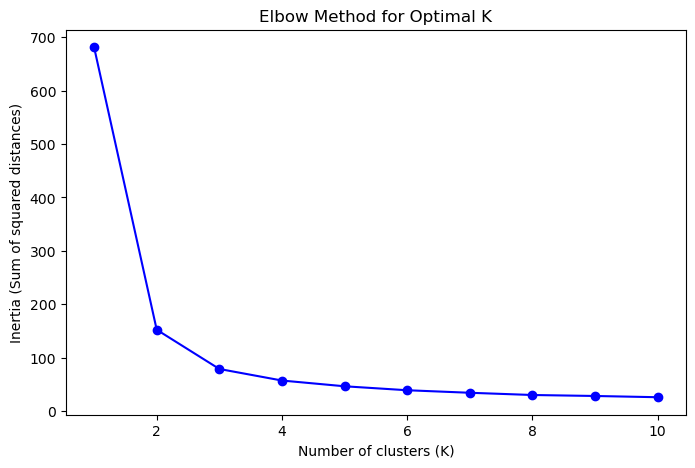

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-', color='blue')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method for Optimal K')
plt.show()

### Silhouette Score
The Silhouette Score measures how similar a data point is to its own cluster compared to other clusters. A higher Silhouette Score indicates better-defined clusters. The optimal number of clusters can be found by maximizing the Silhouette Score.

C:\Users\augus\anaconda new\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\augus\anaconda new\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\augus\anaconda new\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\augus\anaconda new\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, wh

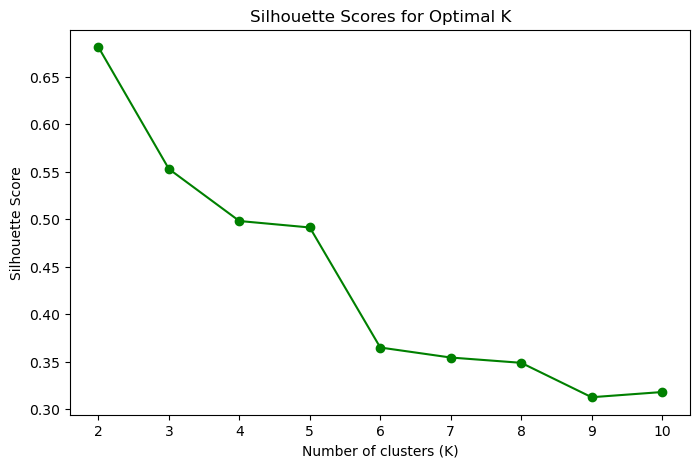

In [5]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_df)
    score = silhouette_score(iris_df, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, 'bo-', color='green')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Optimal K')
plt.show()

## KMeans Clustering

### Description of KMeans Clustering
KMeans clustering is a partitioning method that divides a dataset into K distinct, non-overlapping subsets (clusters). It works by iteratively assigning data points to the nearest cluster center and then recalculating the cluster centers.

#### Why KMeans is Suitable for the Iris Dataset
KMeans is suitable for the Iris dataset because the dataset is relatively small, well-structured, and known to form distinct clusters that correspond to the three species of Iris flowers. The KMeans algorithm can efficiently partition the dataset into these clusters.


C:\Users\augus\anaconda new\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\augus\anaconda new\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


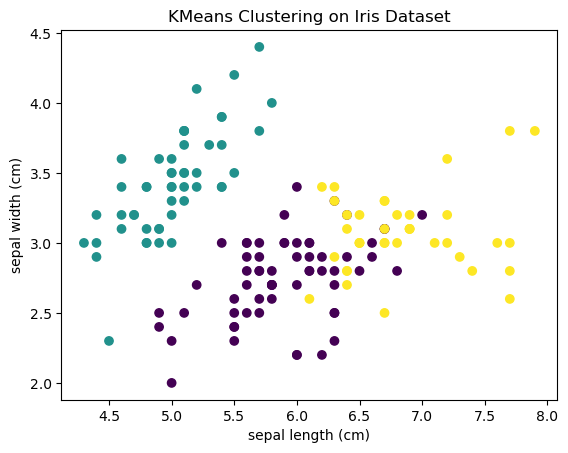

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)

iris_df['kmeans_cluster'] = kmeans.fit_predict(iris_df)

plt.scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 1], c=iris_df['kmeans_cluster'], cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('KMeans Clustering on Iris Dataset')
plt.show()

## Hierarchical Clustering

### Description of Hierarchical Clustering
Hierarchical clustering builds a hierarchy of clusters either by merging small clusters into larger ones (agglomerative) or by splitting large clusters into smaller ones (divisive). The result can be visualized using a dendrogram.

### Suitability of Hierarchical Clustering for the Iris Dataset
Hierarchical clustering is suitable for the Iris dataset as it allows for a visual representation of data in a dendrogram, revealing the hierarchical structure of clusters.

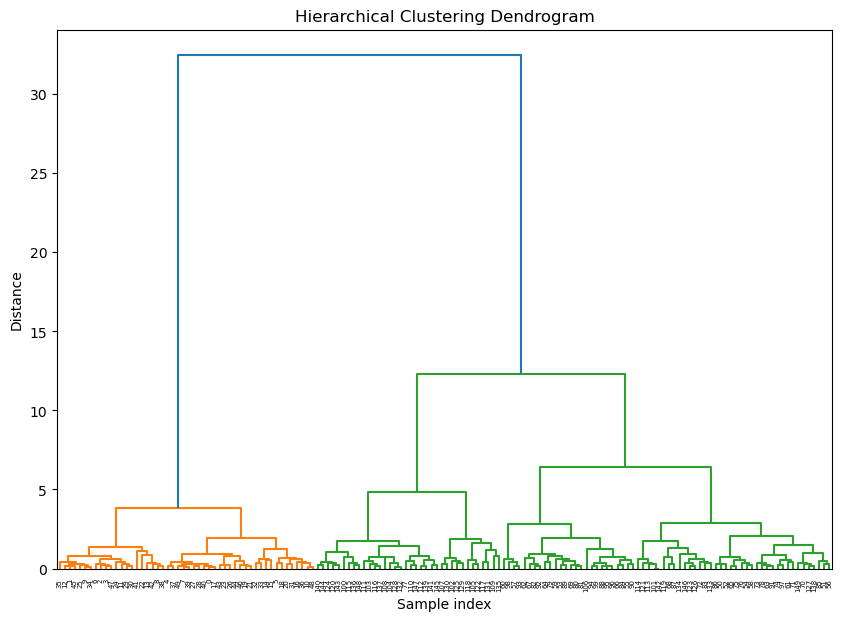

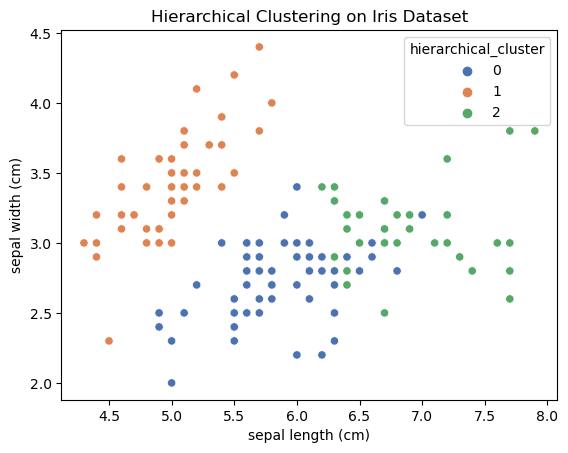

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

Z = linkage(iris_df.iloc[:, :-1], method='ward')

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

hierarchical = AgglomerativeClustering(n_clusters=3)

iris_df['hierarchical_cluster'] = hierarchical.fit_predict(iris_df.iloc[:, :-1])

sns.scatterplot(x=iris_df.iloc[:, 0], y=iris_df.iloc[:, 1], hue=iris_df['hierarchical_cluster'], palette='deep')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Hierarchical Clustering on Iris Dataset')
plt.show()

## Conclusion

In this project, we applied two clustering techniques, KMeans and Hierarchical Clustering, to the Iris dataset. Using the Elbow Method and Silhouette Score, we determined that the optimal number of clusters is 3. Both algorithms successfully identified clusters within the dataset that correspond to the different species of Iris flowers. The KMeans algorithm provided a quick and efficient method for clustering, while Hierarchical Clustering offered a visual representation of the data's hierarchical structure.